In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [199]:
data = pd.read_excel('iris.xls')

In [200]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [201]:
data.shape

(150, 5)

In [202]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


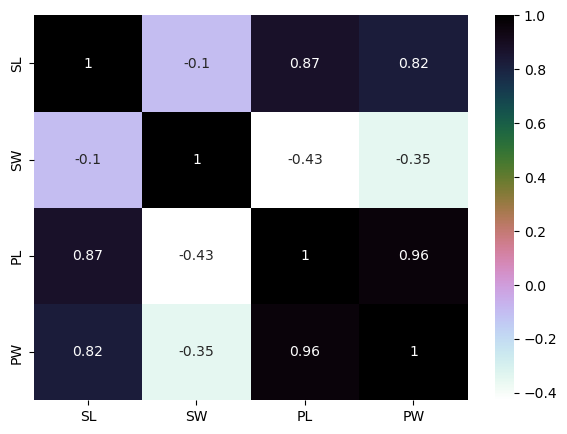

In [203]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [204]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [205]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [206]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [207]:
for col in ['SL', 'SW', 'PL']:
    data[col] = data[col].fillna(data[col].median())

In [208]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [209]:
#data.Classification.nunique()

In [210]:
#data1 = pd.get_dummies(data)

In [211]:
#data1.head()

In [212]:
x = data.drop(['Classification'], axis=1)
y = data['Classification']

In [213]:
print(x)

      SL   SW    PL   PW
0    5.1  3.5  1.40  0.2
1    4.9  3.0  1.40  0.2
2    5.8  3.2  1.30  0.2
3    4.6  3.1  1.50  0.2
4    5.0  3.6  1.40  0.2
..   ...  ...   ...  ...
145  6.7  3.0  5.20  2.3
146  6.3  2.5  5.00  1.9
147  6.5  3.0  4.35  2.0
148  6.2  3.4  5.40  2.3
149  5.9  3.0  5.10  1.8

[150 rows x 4 columns]


In [214]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object


In [215]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)

## Logistic regression model

In [216]:
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train, Y_train)
y_pred_logit = logit_model.predict(X_test)
print(accuracy_score(Y_test,y_pred_logit))

1.0


E:\anaconda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [217]:
confusion_matrix(Y_test,y_pred_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [218]:
accuracy_score(Y_test,y_pred_logit)

1.0

## KNN

In [219]:
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
accuracy_score(Y_test,y_pred_knn)

0.9666666666666667

In [220]:
lst_acc=[]
neighbors=range(3,20,2)
for i in range(3,20,2):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    lst_acc.append(acc)

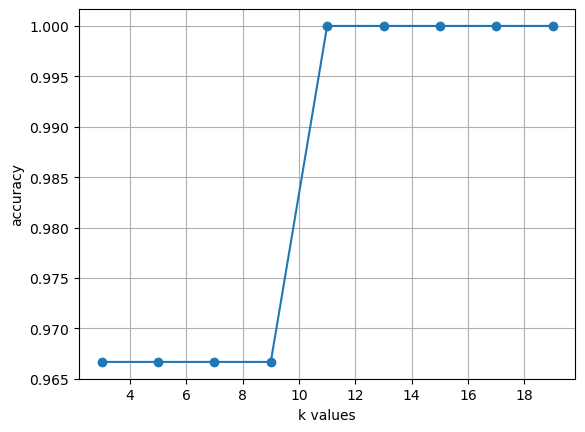

In [221]:
plt.plot(neighbors,lst_acc,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.grid()

In [222]:
knn= KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
accuracy_score(Y_test,y_pred_knn)

1.0

## DecisionTreeClassifier


In [223]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
accuracy_score(Y_test,y_pred_dt)

1.0

## RandomForestClassifier

In [224]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
accuracy_score(Y_test,y_pred_rf)

1.0

In [229]:
clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(X_train,Y_train)
y_pred_svm=clf_svm.predict(X_test)
accuracy_score(Y_test,y_pred_svm)

1.0